

# Le modèle le plus moche au monde




In [1]:
import numpy as np
import os
import time
import csv
import shutil
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model

Using TensorFlow backend.


In [2]:
!git clone https://github.com/anwar-ai/Classification-des-defauts-Tolerie.git

Cloning into 'Classification-des-defauts-Tolerie'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 960 (delta 4), reused 0 (delta 0), pack-reused 945
Receiving objects: 100% (960/960), 15.43 MiB | 15.13 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [13]:
import os
import numpy as np
import cv2

path="Classification-des-defauts-Tolerie/"
img_list=[]
defect_type=["usure","craquelage","Piqures"]
for type_ in defect_type:
  img_names_list=os.listdir(path+type_)
  for j in img_names_list :
    image=cv2.imread(path+type_+"/"+j,0)
    image=cv2.resize(image,(224,224))
    img_list.append(image)
image_=np.array(img_list).reshape(900,224,224,1)
  
print(image_.shape)

(900, 224, 224, 1)


In [0]:
x=image_
num_of_samples = image_.shape[0]

labels = np.ones((num_of_samples,),dtype='int64')
num_classes = 3
labels[0:300]=0
labels[300:600]=1
labels[600:900]=2


Y = np_utils.to_categorical(labels, num_classes)

x,y = shuffle(image_,Y, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [0]:

from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random

In [0]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(224, 224, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(100, (7, 7), input_shape=(224, 224, 1), activation='relu'))
  model.add(Conv2D(100, (7, 7), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(200, (3, 3), activation='relu'))
   
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(3, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(3, activation='softmax'))
  
  model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [35]:
model = modified_model()
print(model.summary())

history = model.fit(X_train, y_train, batch_size=50,epochs=10, shuffle = 1)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 220, 220, 60)      1560      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 216, 216, 60)      90060     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 108, 108, 60)      0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 102, 102, 100)     294100    
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 96, 96, 100)       490100    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 48, 48, 100)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 46, 46, 200)     

Text(0.5, 0, 'epoch')

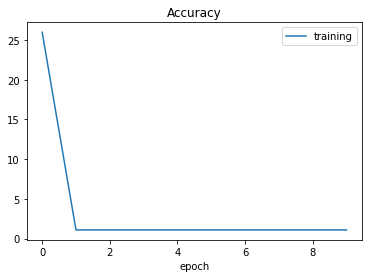

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
 
plt.title('Loss')
plt.xlabel('epoch')

 
 
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')